In [1]:
import expression as ep
import group as grp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
first_half = [
    "x4+x5x6x7",
    "x5+x5x6x7+x6x7x4",
    "x6+x6x7x4+x7x4x5",
    "x7+x7x4x5+x4x5x6"
]

In [29]:
def test_first_half(first_half):
    first_half = list(map(ep.Expr, first_half))
    base_terms = ["x{}".format(i) for i in range(ep.N_X//2, ep.N_X)]
    base_terms = list(map(ep.Expr, base_terms))
    second_half = []
    for t, equ in zip(base_terms, first_half[::-1]):
        new_eq = t + equ.get_pair_expr()
        second_half.append(new_eq)
    G = grp.Group(first_half + second_half)
#     print(G.test_permutation())
    out = G.get_all_out().astype(np.int32)
    #print(out)
    plt.figure(figsize=(16, 9))
    plt.imshow(out[:, :])
    plt.show()
    return out
# test_first_half(first_half)

In [24]:
first_half = [
    "x4+x5x6x7",
    "x5+x4x5x6+x4x6x7",
    "x6+x4x5x7+x5x6x7",
    "x7+x4x5x6+x4x5x7"
]

False


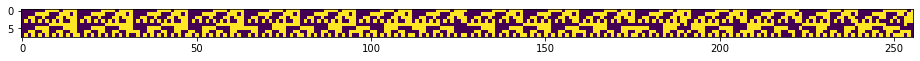

In [5]:
out = test_first_half([
    "x4+x4x6x7+x5x6x7+x0x1x3x4x6x7+x0x1x2x3x4x5x6",
    "x5+x4x5x6+x4x6x7+x1x2x3x4x5x6+x0x1x2x3x4x5x7",
    "x6+x4x5x7+x5x6x7+x0x1x2x5x6x7+x0x1x2x3x4x6x7",
    "x7+x4x5x6+x4x5x7+x0x2x3x4x5x7+x0x1x2x3x5x6x7"
])

In [52]:
def extract_duplicate_out(out):
    out_uniq, ctrs = np.unique(out, axis=1, return_counts=True)
    duplicate_out = out_uniq[:, ctrs > 1]
    for d in duplicate_out.T:
        print("==============")
        for i, o in enumerate(out.T):
            if (o == d).all():
                bin_fmt = "{:0" + str(ep.N_X) + "b}"
#                 print(bin_fmt)
                print(bin_fmt.format(i), o)
# extract_duplicate_out(out)

In [38]:
ep.reset_N(12)

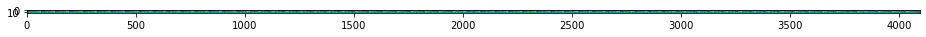

In [46]:
out = test_first_half([
    "x6+x6x8x9x10x11+x7x8x9x10x11+x0x1x2x3x5x6x8x9x10x11+x0x1x2x3x4x5x6x7x8x9x10",
    "x7+x6x8x9x10x11+x7x8x9x10x11+x0x1x2x3x4x7x8x9x10x11+x0x1x2x3x4x5x6x7x8x9x11",
    "x8+x6x7x8x10x11+x6x7x9x10x11+x0x1x3x4x5x6x7x8x10x11+x0x1x2x3x4x5x6x7x8x10x11",
    "x9+x6x7x8x9x11+x6x7x8x10x11+x0x2x3x4x5x6x7x8x9x11+x0x1x2x3x4x5x6x7x9x10x11",
    "x10+x6x7x8x9x10+x6x7x8x9x11+x1x2x3x4x5x6x7x8x9x10+x0x1x2x3x4x5x6x8x9x10x11",
    "x11+x6x7x8x9x10+x6x7x9x10x11+x0x1x2x4x5x6x7x9x10x11+x0x1x2x3x4x5x7x8x9x10x11"
])

In [53]:
extract_duplicate_out(out)

010101011111 [1 0 1 1 1 1 0 0 1 0 1 0]
111111111101 [1 0 1 1 1 1 0 0 1 0 1 0]
010101111101 [1 1 1 0 1 1 1 0 1 0 0 0]
111111110111 [1 1 1 0 1 1 1 0 1 0 0 0]
010101110111 [1 1 1 1 1 0 1 0 0 0 1 0]
111111011111 [1 1 1 1 1 0 1 0 0 0 1 0]


In [20]:
ep.reset_N(10)

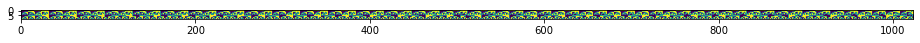

In [30]:
out = test_first_half([
    "x5+x5x7x8x9+x6x7x8x9+x0x1x2x4x5x7x8x9+x0x1x2x3x4x5x6x7x8",
    "x6+x5x7x8x9+x6x7x8x9+x0x1x2x3x6x7x8x9+x0x1x2x3x4x5x6x7x9",
    "x7+x5x6x7x9+x5x6x8x9+x0x2x3x4x5x6x7x9+x0x1x2x3x4x5x6x8x9",
    "x8+x5x6x7x8+x5x6x7x9+x1x2x3x4x5x6x7x8+x0x1x2x3x4x5x7x8x9",
    "x9+x5x6x7x8+x5x6x8x9+x0x1x3x4x5x6x8x9+x0x1x2x3x4x6x7x8x9",
])

In [31]:
out.shape

(10, 1024)

In [32]:
extract_duplicate_out(out)

0100101111 [1 0 1 1 1 0 0 1 1 0]
1111111101 [1 0 1 1 1 0 0 1 1 0]
0100111101 [1 1 0 1 1 1 0 1 0 0]
1111111011 [1 1 0 1 1 1 0 1 0 0]
0100111011 [1 1 1 1 0 1 0 0 1 0]
1111101111 [1 1 1 1 0 1 0 0 1 0]
